# Analysis of the YELP Dataset

Analysis Ideas:
- Average rating per city
- Map with reviews
- Types of restaurants (frequency, avg rating, frequency for cities)
- Most frequent words in reviews
- review sentiment analysis
- Outliers? Restaurants that are not part of any metropolitan area where other restaurants are (clustering and distance from center)

https://www.kaggle.com/code/ambarish/a-very-extensive-data-analysis-of-yelp
https://www.kaggle.com/code/jagangupta/what-s-in-a-review-yelp-ratings-eda

### Imports and General Functions

In [1]:
# Imports
import json
import typing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [2]:
def json_to_df(path):
    with open(path) as data_file:
        data = []
        for line in data_file:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    return df

## Analysis of the Business Data

In [3]:
df_business = json_to_df("/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json")
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [4]:
m = folium.Map(location=[40.479627, -99.396414], tiles='cartodbpositron', zoom_start=4)

mc = MarkerCluster()
for idx, row in df_business.sample(10000).iterrows():
    mc.add_child(Marker([row['latitude'], row['longitude']]))
m.add_child(mc)
print("Map with 10k samples:")
m

Map with 10k samples:


In [5]:
# Unique values in each column
b_unique_count = {col_name: len(df_business[col_name].unique()) for col_name in ['city', 'state', 'postal_code', 'stars', 'is_open']}
print(f"Unique values for a selection of columns: {b_unique_count}\n")

# Statistcs on the stars and review_count
print(f"Statistcs on the stars and review_count:\n {df_business[['stars', 'review_count']].describe()}")

Unique values for a selection of columns: {'city': 1416, 'state': 27, 'postal_code': 3362, 'stars': 9, 'is_open': 2}

Statistcs on the stars and review_count:
                stars   review_count
count  150346.000000  150346.000000
mean        3.596724      44.866561
std         0.974421     121.120136
min         1.000000       5.000000
25%         3.000000       8.000000
50%         3.500000      15.000000
75%         4.500000      37.000000
max         5.000000    7568.000000


In [6]:
print("Number of McDonald's:")
list_of_mcd = []
for idx, row in df_business.iterrows():
    if "McDonald" in row['name']:
        list_of_mcd.append(row["name"])
dict(Counter(list_of_mcd))

Number of McDonald's:


{"McDonald's": 703,
 'McDonald’s': 1,
 'McDonalds': 5,
 "McDonalds's": 1,
 'Ronald McDonald House': 3,
 'Philadelphia Ronald McDonald House': 1,
 'McDonald Park': 1,
 'McDonald Pest Control': 1,
 'Max McDonald Surfboard Repair': 1}

## Analysis of the Checkin Data

In [7]:
df_checkin = json_to_df("/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json")
df_checkin.head(3)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


In [8]:
df_checkin.head(1)["date"][0]

'2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21:02:03, 2021-05-25 21:16:54, 2021-08-06 21:08:08, 2021-10-02 15:15:42, 2021-11-11 16:23:50'

## Analysis of the Review Data

In [9]:
df_review = json_to_df("/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json")
df_review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


In [10]:
avg_review_len = df_review['text'].str.len().mean()
print(f"Avg review length: {avg_review_len:.1f}")

Avg review length: 567.8


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample your data
sample_size = 10000
sampled_data = df_review['text'].sample(sample_size)

# Create the CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(sampled_data)

# Get feature names
feature_names = word_vectorizer.get_feature_names_out()

# Calculate frequencies
frequencies = sparse_matrix.sum(axis=0).A1

# Create a DataFrame
n_grams = pd.DataFrame({'frequency': frequencies}, index=feature_names)

print(f"Unigrams (10k samples):")
print(n_grams.sort_values(by='frequency', ascending=False))

Unigrams (10k samples):
          frequency
the           52091
and           37273
to            25318
was           18890
it            15354
...             ...
meads             1
meager            1
meagerly          1
mealier           1
風味更佳              1

[25629 rows x 1 columns]


## Analysis of the Tip Data

In [12]:
df_tip = json_to_df("/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json")
df_tip.head(20)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
5,trf3Qcz8qvCDKXiTgjUcEg,7Rm9Ba50bw23KTA8RedZYg,"Chili Cup + Single Cheeseburger with onion, pi...",2012-03-13 04:00:52,0
6,SMGAlRjyfuYu-c-22zIyOg,kH-0iXqkL7b8UXNpguBMKg,"Saturday, Dec 7th 2013, ride Patco's Silver Sl...",2013-12-03 23:42:15,0
7,YVBB9g23nuVJ0u44zK0pSA,jtri188kuhe_AuEOJ51U_A,This is probably the best place in the cool Sp...,2016-11-22 22:14:58,0
8,VL12EhEdT4OWqGq0nIqkzw,xODBZmX4EmlVvbqtKN7YKg,Tacos,2012-07-27 01:48:24,0
9,4ay-fdVks5WMerYL_htkGQ,pICJRcyqW1cF96Q3XhLSbw,Starbucks substitute in boring downtown Tampa....,2012-06-09 22:57:04,0


## Analysis of the User Data

In [13]:
df_user = json_to_df("/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json")
df_user.head(3)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18


In [14]:
print(f"User count: {len(df_user)}")

User count: 1987897


In [15]:
avg_review_count = df_user["review_count"].mean()
print(f"Avg review count: {avg_review_count:.1f}")

Avg review count: 23.4


Text(0.5, 0, 'Review Count')

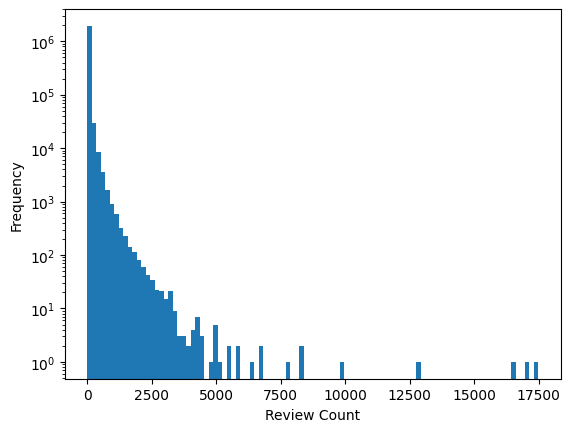

In [16]:
ax = df_user['review_count'].plot.hist(bins=100, log=True)
ax.set_xlabel('Review Count')

In [17]:
print(len(df_business))
print(len(df_checkin))
print(len(df_review))
print(len(df_tip))
print(len(df_user))

150346
131930
6990280
908915
1987897
